# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Регрессия и классификация. <font color="blue"><i>Легкая часть</i></font>


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 3 балла
* Задача 2 &mdash; 6 баллов
* Задача 3 &mdash; 2 балла

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 2 балла
* Задача 5 &mdash; 5 баллов
* Задача 6 &mdash; 5 баллов
* Задача 7 &mdash; 3 балла

Условие <b><font color="orange">сложной части</font></b> расположено по <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task4_hard.html">ссылке</a>.

In [2]:
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
#pd.options.mode.chained_assignment = None

# обратите внимание, что Scikit-Learn импортируется как sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.datasets import fetch_20newsgroups

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

В этой задаче нужно визуализировать *центральную предельную теорему*. Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/LLN.html">ноутбук</a> с лекции про закон больших чисел. За использование циклов оценка может быть существенно снижена.

**a).** Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\longrightarrow} \mathcal{N}(0, 1),$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $$Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}.$$
Обратите внимание, что нужно взять теоретические математическое ожидание и дисперсию, а не вычислять их по выборке.

In [2]:
size = 300
sample_count = 500

expected = (np.arange(size) + 1)
variance = (np.arange(size) + 1)

samples = sps.expon.rvs(size = (sample_count, size))
cum_sum = samples.cumsum(axis = 1)
z = (cum_sum - expected) / (variance ** 0.5)

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

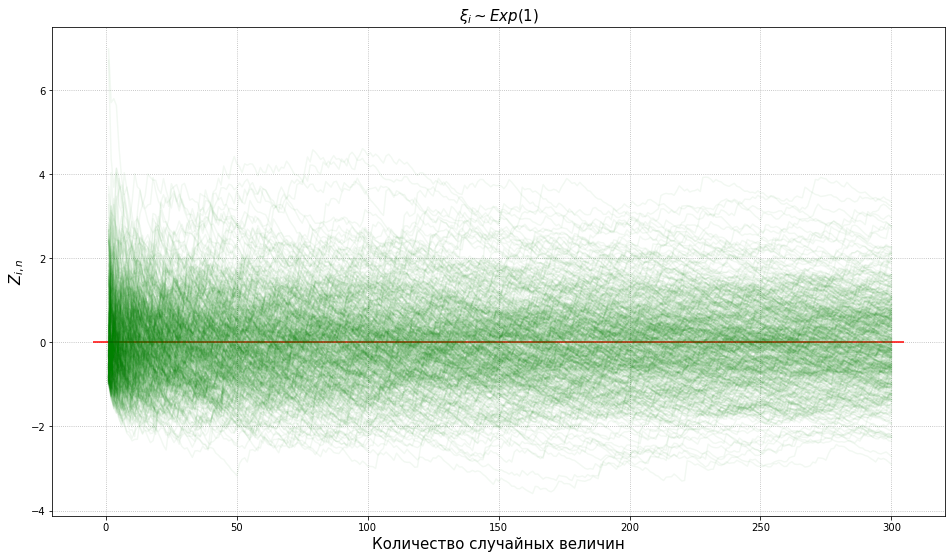

In [3]:
plt.figure(figsize = (16, 9))


for i in range(sample_count):
    plt.plot(np.arange(size) + 1, z[i], c='g', alpha = 0.05)
    
plt.hlines(0, -5, 305, color = 'r')
    
    
plt.grid(ls=':')
plt.title(r'$\xi_i \sim Exp(1)$', fontsize=15)
plt.xlabel('Количество случайных величин', fontsize=15)
plt.ylabel(r'$Z_{i, n}$', fontsize=15)
plt.show()

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду.

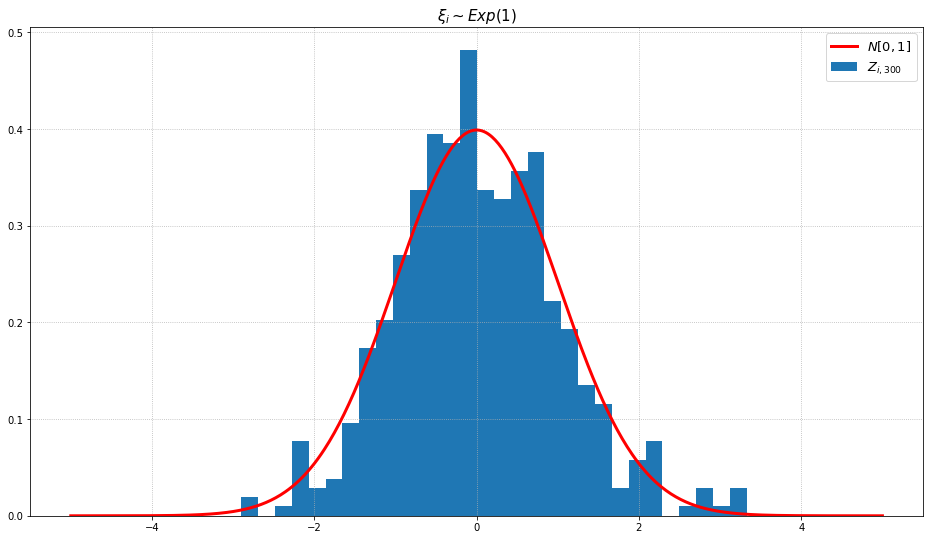

In [4]:
plt.figure(figsize = (16, 9))

plt.hist(z[:, -1],
         bins = 30,
         density = True,
         label = r'$Z_{i, 300}$',)

grid = np.linspace(-5, 5, 500)

plt.plot(
    grid, 
    sps.norm.pdf(grid), 
    color = 'red', 
    linewidth = 3 , 
    label = r'$N[0, 1]$'
)


plt.legend(fontsize=13, loc=0)
plt.grid(ls=':')
plt.title(r'$\xi_i \sim Exp(1)$', fontsize=15)
plt.show()


**b).** Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.

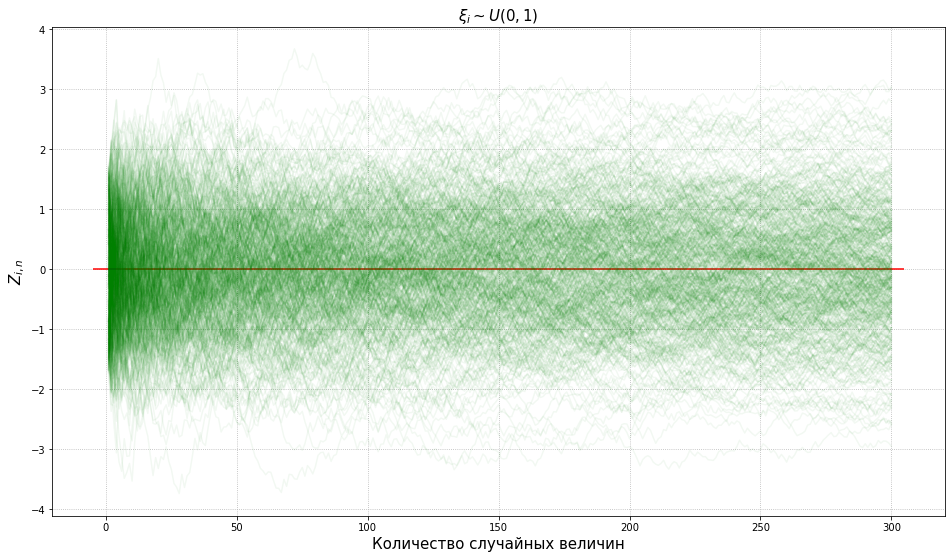

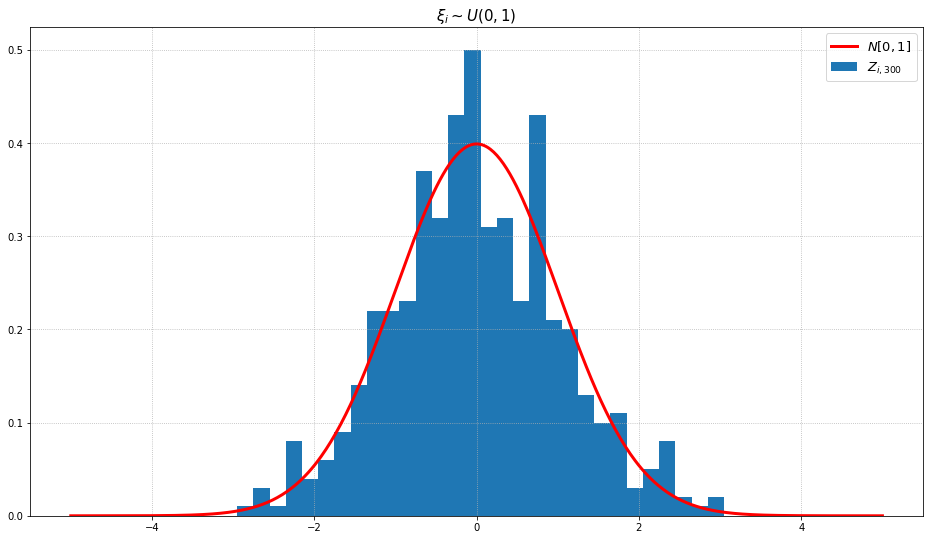

In [5]:
size = 300
sample_count = 500


expected = (np.arange(size) + 1) * (1/2)
variance = (np.arange(size) + 1) * (1/12)

samples = sps.uniform.rvs(size = (sample_count, size))
cum_sum = samples.cumsum(axis = 1)
z = (cum_sum - expected) / (variance ** 0.5)


##############################################################################
plt.figure(figsize = (16, 9))


for i in range(sample_count):
    plt.plot(np.arange(size) + 1, z[i], c='g', alpha = 0.05)
    
plt.hlines(0, -5, 305, color = 'r')
    
    
plt.grid(ls=':')
plt.title(r'$\xi_i \sim U(0, 1)$', fontsize=15)
plt.xlabel('Количество случайных величин', fontsize=15)
plt.ylabel(r'$Z_{i, n}$', fontsize=15)
plt.show()


##############################################################################
plt.figure(figsize = (16, 9))

plt.hist(z[:, -1],
         bins = 30,
         density = True,
         label = r'$Z_{i, 300}$',)

grid = np.linspace(-5, 5, 500)

plt.plot(
    grid, 
    sps.norm.pdf(grid), 
    color = 'red', 
    linewidth = 3 , 
    label = r'$N[0, 1]$'
)


plt.legend(fontsize=13, loc=0)
plt.grid(ls=':')
plt.title(r'$\xi_i \sim U(0, 1)$', fontsize=15)
plt.show()


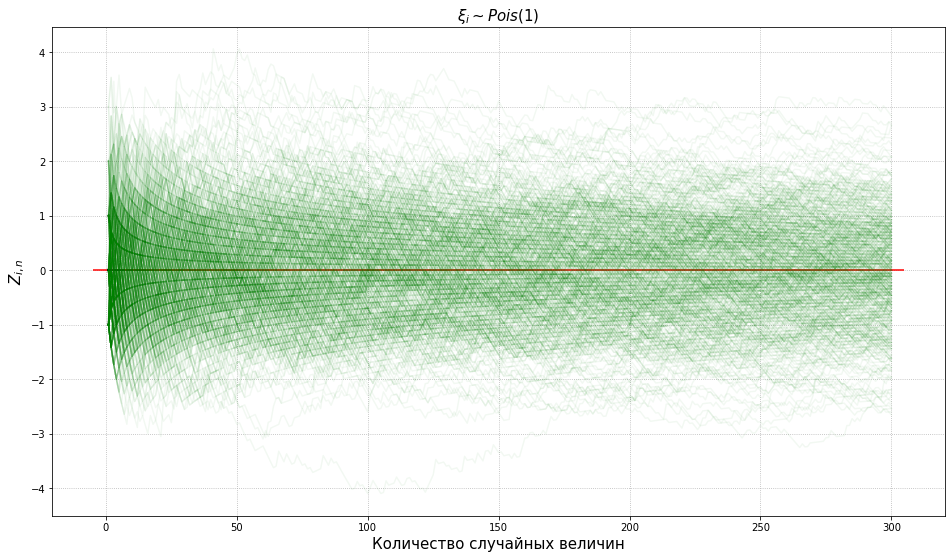

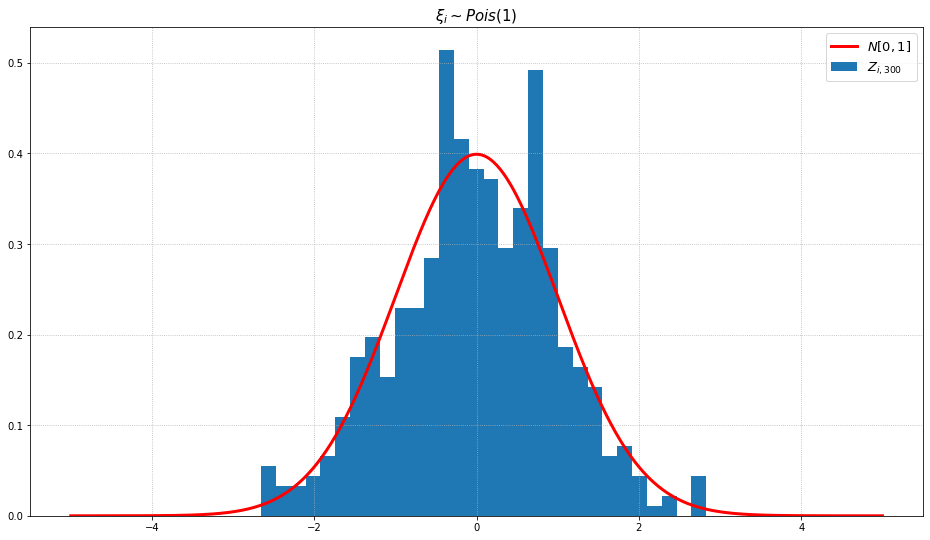

In [6]:
size = 300
sample_count = 500

parametr = 1
expected = (np.arange(size) + 1) * parametr
variance = (np.arange(size) + 1) * parametr

samples = sps.poisson(parametr).rvs(size = (sample_count, size))
cum_sum = samples.cumsum(axis = 1)
z = (cum_sum - expected) / (variance ** 0.5)


##############################################################################
plt.figure(figsize = (16, 9))


for i in range(sample_count):
    plt.plot(np.arange(size) + 1, z[i], c='g', alpha = 0.05)
    
plt.hlines(0, -5, 305, color = 'r')
    
    
plt.grid(ls=':')
plt.title(r'$\xi_i \sim Pois(1)$', fontsize=15)
plt.xlabel('Количество случайных величин', fontsize=15)
plt.ylabel(r'$Z_{i, n}$', fontsize=15)
plt.show()


##############################################################################
plt.figure(figsize = (16, 9))

plt.hist(z[:, -1],
         bins = 30,
         density = True,
         label = r'$Z_{i, 300}$',)

grid = np.linspace(-5, 5, 500)

plt.plot(
    grid, 
    sps.norm.pdf(grid), 
    color = 'red', 
    linewidth = 3 , 
    label = r'$N[0, 1]$'
)


plt.legend(fontsize=13, loc=0)
plt.grid(ls=':')
plt.title(r'$\xi_i \sim Pois(1)$', fontsize=15)
plt.show()


Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

Рекомендуем также посмотреть <a target="_blank" href="https://www.zoology.ubc.ca/~whitlock/Kingfisher/CLT.htm">интерактивную визуализацию</a>.

### Вывод: ###

---
---
---
---
---
---

### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок по городу на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов в ряде городов США. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

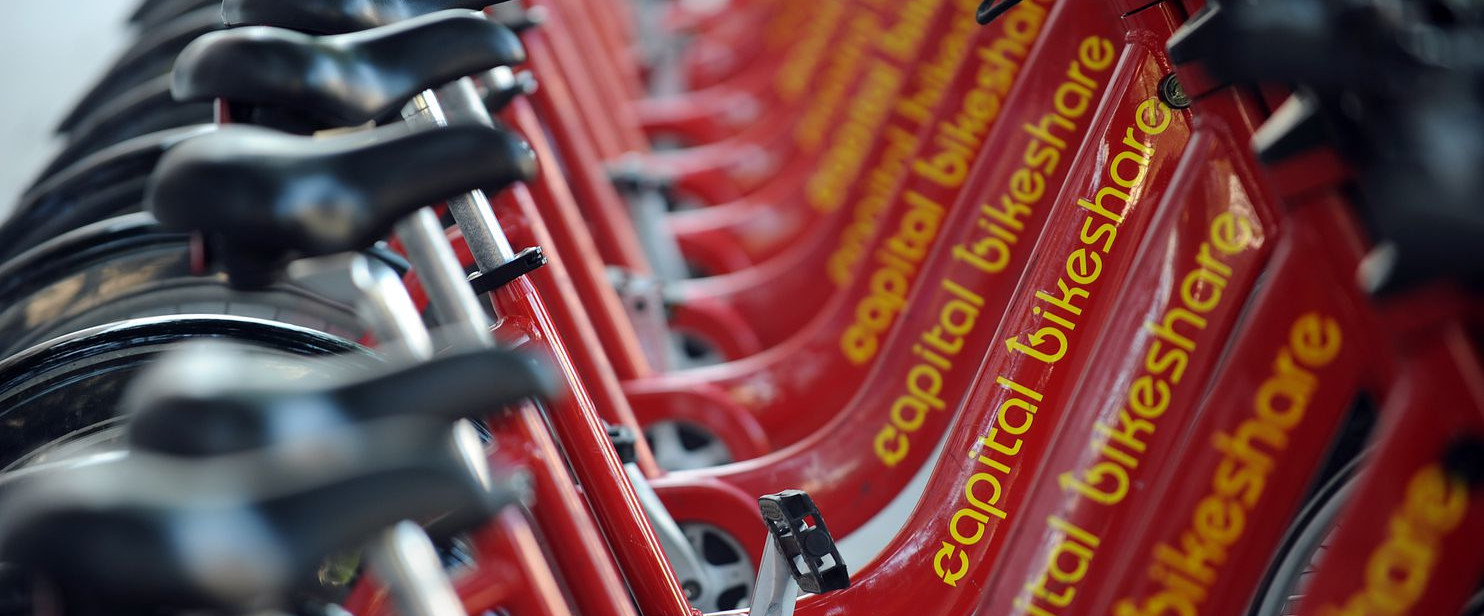

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; весна, 2 &mdash; лето, 3 &mdash; осень, 4 &mdash; зима;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [3]:
data_csv = pd.read_csv('day.csv')
data = data_csv[['season',
                 'mnth',
                 'holiday',
                 'weekday',
                 'workingday',
                 'weathersit',
                 'temp',
                 'atemp',
                 'hum',
                 'windspeed',
                 'cnt'
                ]]

train, test = train_test_split(data, test_size = 0.2)
train.shape, test.shape

((584, 11), (147, 11))

Посмотрите по графикам, как целевой признак зависит от остальных и поймите характер зависимости целевого признака от остальных. 

In [12]:
data.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

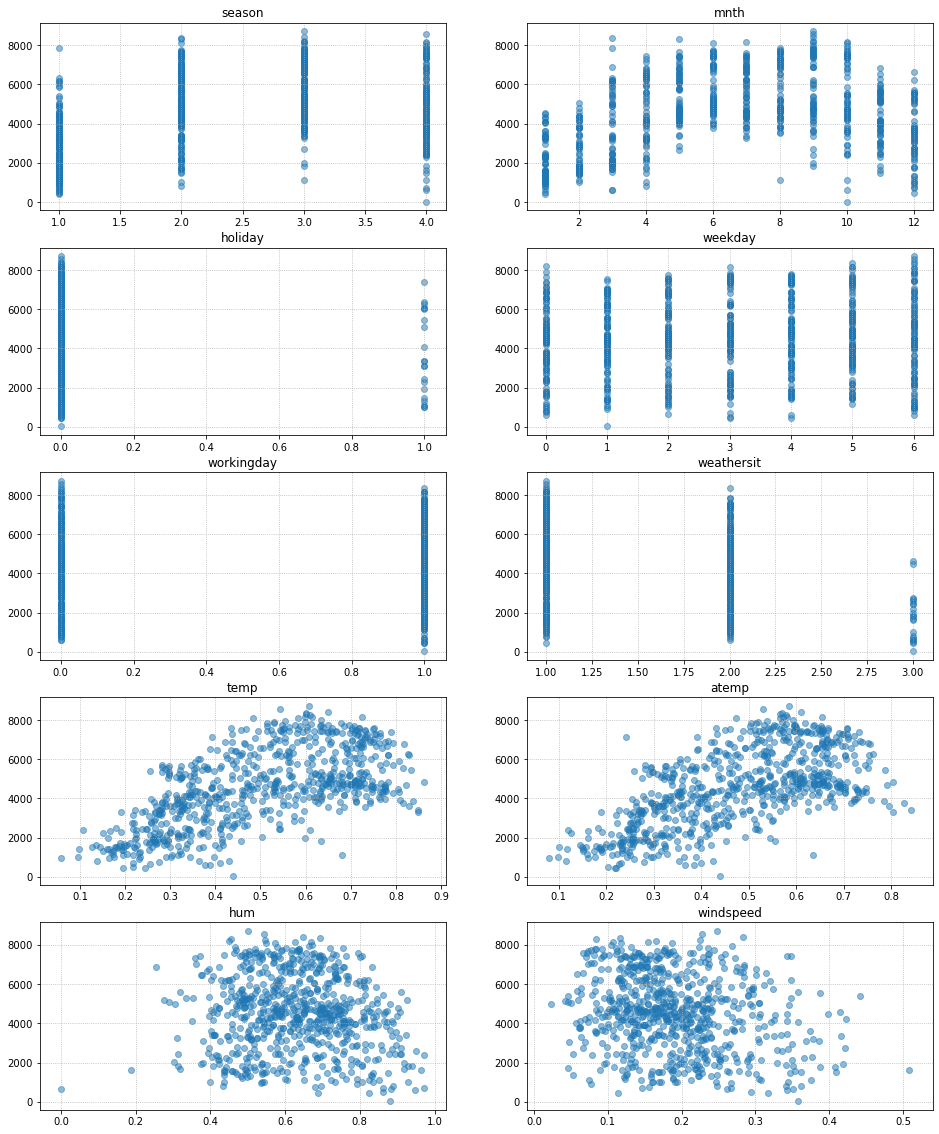

In [5]:
plt.figure(figsize=(16, 20))

n = 1
for i in data.columns[:-1]:
    plt.subplot(5, 2, n)
    n += 1
    plt.scatter(data[i], data['cnt'], alpha = 0.5)

    #plt.legend(fontsize=13, loc=0)
    plt.grid(ls=':')
    plt.title(i)
    
plt.show()

Какие признаки категориальные, а какие &mdash; вещественные? Что нужно сделать с категориальными признаками? Выполните это. При необходимости можно сделать несложную обработку вещественных признаков.

In [9]:
categorial_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']  # категориальные признаки
real_features = ['temp', 'atemp', 'hum', 'windspeed']  # вещественные признаки
target_feature = 'cnt'  # целевой признак

encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
train_cat

X_train = np.hstack([train[real_features], train_cat])
X_train.shape

(584, 28)

Обучите линейную регрессию из `sklearn` на наших данных и посмотрите на полученные оценки коэффициентов.

In [10]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем

model.coef_

array([ 6368.58069154,   331.34676075, -2923.42311578, -3207.47259252,
        1267.51966107,   985.50074731,  1566.11944929,    76.95114495,
          75.94248325,  -238.16594519,  -277.35223645,  -632.35328235,
       -1178.83133029,  -614.44035768,   243.70128379,   134.42502432,
        -330.73106137,  -169.44277383,  -298.46189092,   -79.89401929,
          -9.76764775,    48.676639  ,    50.39558996,    28.03831698,
         527.89691238,   335.91076981,  -412.64778398, -2060.98488347])

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE.

In [11]:
# Кодируем категориальные признаки с помощью метода transform обученного ранее кодировщика
test_cat = encoder.transform(test[categorial_features])

# Соединяем данные
X_test = np.hstack([test[real_features], test_cat])

test_preds = model.predict(X_test)

def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

RMSE = metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5
print(f'RMSE: {RMSE}')
MAE = metrics.mean_absolute_error(test[target_feature], test_preds)
print(f'MAE: {MAE}')
MAPE = mean_absolute_percentage_error(test[target_feature], test_preds)
print(f'MAPE: {MAPE}')

RMSE: 1353.2317555073455
MAE: 1204.528295339969
MAPE: 95.57218520744337


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

Сделайте выводы.

### Задача 3.

На занятии мы уже научились классифицировать текстовые сообщения на нормальные и спам. Теперь перед вами стоит более серьезная задача &mdash; построить систему, автоматически классифицирующую поступающие новостные сюжеты на несколько заранее заданных категорий.
 
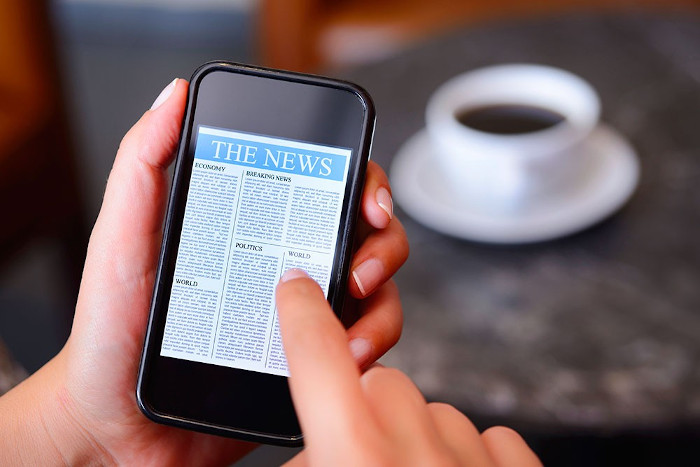



Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [12]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [13]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [14]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [15]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

С помощью методов, изученных в рамках нашего курса, постройте классификатор новостных сюжетов на тематические группы. При построении классификатора **запрещено пользоваться тестовой выборкой**. Для настройки классификатора, например, выбора оптимальных гиперпараметров, можно разделить обучающую выборку на две части &mdash; непосредственно обучающую и валидационную. Первую часть использовать для непосредственного обучения, а вторую &mdash; для настройки, пытаясь по ней оптимизировать качество.

In [27]:
data_train = pd.DataFrame([data_train['data'], data_train['target']]).T[:1000]
data_train.columns = ['data', 'target']
data_train.groupby('target').count()

data_test = pd.DataFrame([data_test['data'], data_test['target']]).T[:1000]
data_test.columns = ['data', 'target']

In [46]:
vectorizer = CountVectorizer(min_df=0.005, max_df=0.05)
vec_data_train = vectorizer.fit_transform(data_train['data']).toarray()
print(len(vectorizer.get_feature_names()))
#print(vectorizer.get_feature_names())
#print(vec_data_train[:5])
vec_data_train

3572


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
multinomial_nb = MultinomialNB()
multinomial_nb.fit(vec_data_train, data_train.data)

MultinomialNB()

Посчитайте качество на тестовой выборке.

In [48]:
vec_data_test = vectorizer.transform(data_test['data']).toarray()

In [49]:
predictions = multinomial_nb.predict(vec_data_test)
print(f'Точность: {accuracy_score(data_test.data, predictions) :.3}')

Точность: 0.001


Сделайте выводы.

### <font color="orange"><i>Сложная часть</i></font>

Условие <b><font color="orange">сложной части</font></b> расположено по <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task4_hard.html">ссылке</a>.